# This model classifies the data's work. 

# We used libraries for the project. 

# He will be complete 

# Let's take examples.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "playground-series-s5e8"

# 1. Show data

In [2]:
# This library is for a predictive model

library(rpart) 
library(rpart.plot) 
library(naivebayes) 
suppressPackageStartupMessages(library(randomForest))

naivebayes 1.0.0 loaded



For more information please visit: 



https://majkamichal.github.io/naivebayes/



In [3]:
# Read the train dataset
train_df <- read_csv("/kaggle/input/playground-series-s5e8/train.csv")
str(train_df)

Rows: 750000 Columns: 18


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): job, marital, education, default, housing, loan, contact, month, po...
dbl (9): id, age, balance, day, duration, campaign, pdays, previous, y



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [750,000 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id       : num [1:750000] 0 1 2 3 4 5 6 7 8 9 ...
 $ age      : num [1:750000] 42 38 36 27 26 24 39 50 46 39 ...
 $ job      : chr [1:750000] "technician" "blue-collar" "blue-collar" "student" ...
 $ marital  : chr [1:750000] "married" "married" "married" "single" ...
 $ education: chr [1:750000] "secondary" "secondary" "secondary" "secondary" ...
 $ default  : chr [1:750000] "no" "no" "no" "no" ...
 $ balance  : num [1:750000] 7 514 602 34 889 ...
 $ housing  : chr [1:750000] "no" "no" "yes" "yes" ...
 $ loan     : chr [1:750000] "no" "no" "no" "no" ...
 $ contact  : chr [1:750000] "cellular" "unknown" "unknown" "unknown" ...
 $ day      : num [1:750000] 25 18 14 28 3 20 21 31 4 8 ...
 $ month    : chr [1:750000] "aug" "jun" "may" "may" ...
 $ duration : num [1:750000] 117 185 111 10 902 1010 90 49 50 119 ...
 $ campaign : num [1:750000] 3 1 2 2 1 3 1 25 1 1 ...
 $ pdays    : num [1:750000] -1 -1 -1 -1 -1 -1 -1 -1 -1 -

In [4]:
# Convert character columns into factor variables
train_df  <- train_df %>% mutate(across(where(is.character),as.factor))%>%mutate(id = as.integer(id), y = as.factor(y))
summary(train_df)

       id              age                 job             marital      
 Min.   :     0   Min.   :18.00   management :175541   divorced: 74407  
 1st Qu.:187500   1st Qu.:33.00   blue-collar:170498   married :480759  
 Median :375000   Median :39.00   technician :138107   single  :194834  
 Mean   :375000   Mean   :40.93   admin.     : 81492                    
 3rd Qu.:562499   3rd Qu.:48.00   services   : 64209                    
 Max.   :749999   Max.   :95.00   retired    : 35185                    
                                  (Other)    : 84968                    
     education      default         balance      housing       loan       
 primary  : 99510   no :737151   Min.   :-8019   no :338712   no :645023  
 secondary:401683   yes: 12849   1st Qu.:    0   yes:411288   yes:104977  
 tertiary :227508                Median :  634                            
 unknown  : 21299                Mean   : 1204                            
                                 3rd Qu.:

# 2. fix data

In [5]:
# Detect missing values 
train_df %>% mutate(across(everything(), is.na)) %>% summarize(across(everything(),sum))%>% 
    pivot_longer(everything(),names_to = 'columns',values_to  = 'missing_values')

columns,missing_values
<chr>,<int>
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0


In [6]:
# Set plotting options
options(repr.plot.height = 10 , repr.plot.width = 16)

theme_gvglentini <- theme(axis.text = element_text(size = 12) , axis.title = element_text(size = 14) , legend.position = 'number 1',lengend.text = element_text(size = 12),
                             plot.title = element_text(size = 16.5),
                         plot.caption = element_text(size = 8.5) , 
                         strip.text = element_text(size = 12 , face = 'blod')) 
g_caption <- "Kaggle's paint "

Warning message in plot_theme(plot):
“The `lengend.text` theme element is not defined in the element hierarchy.”


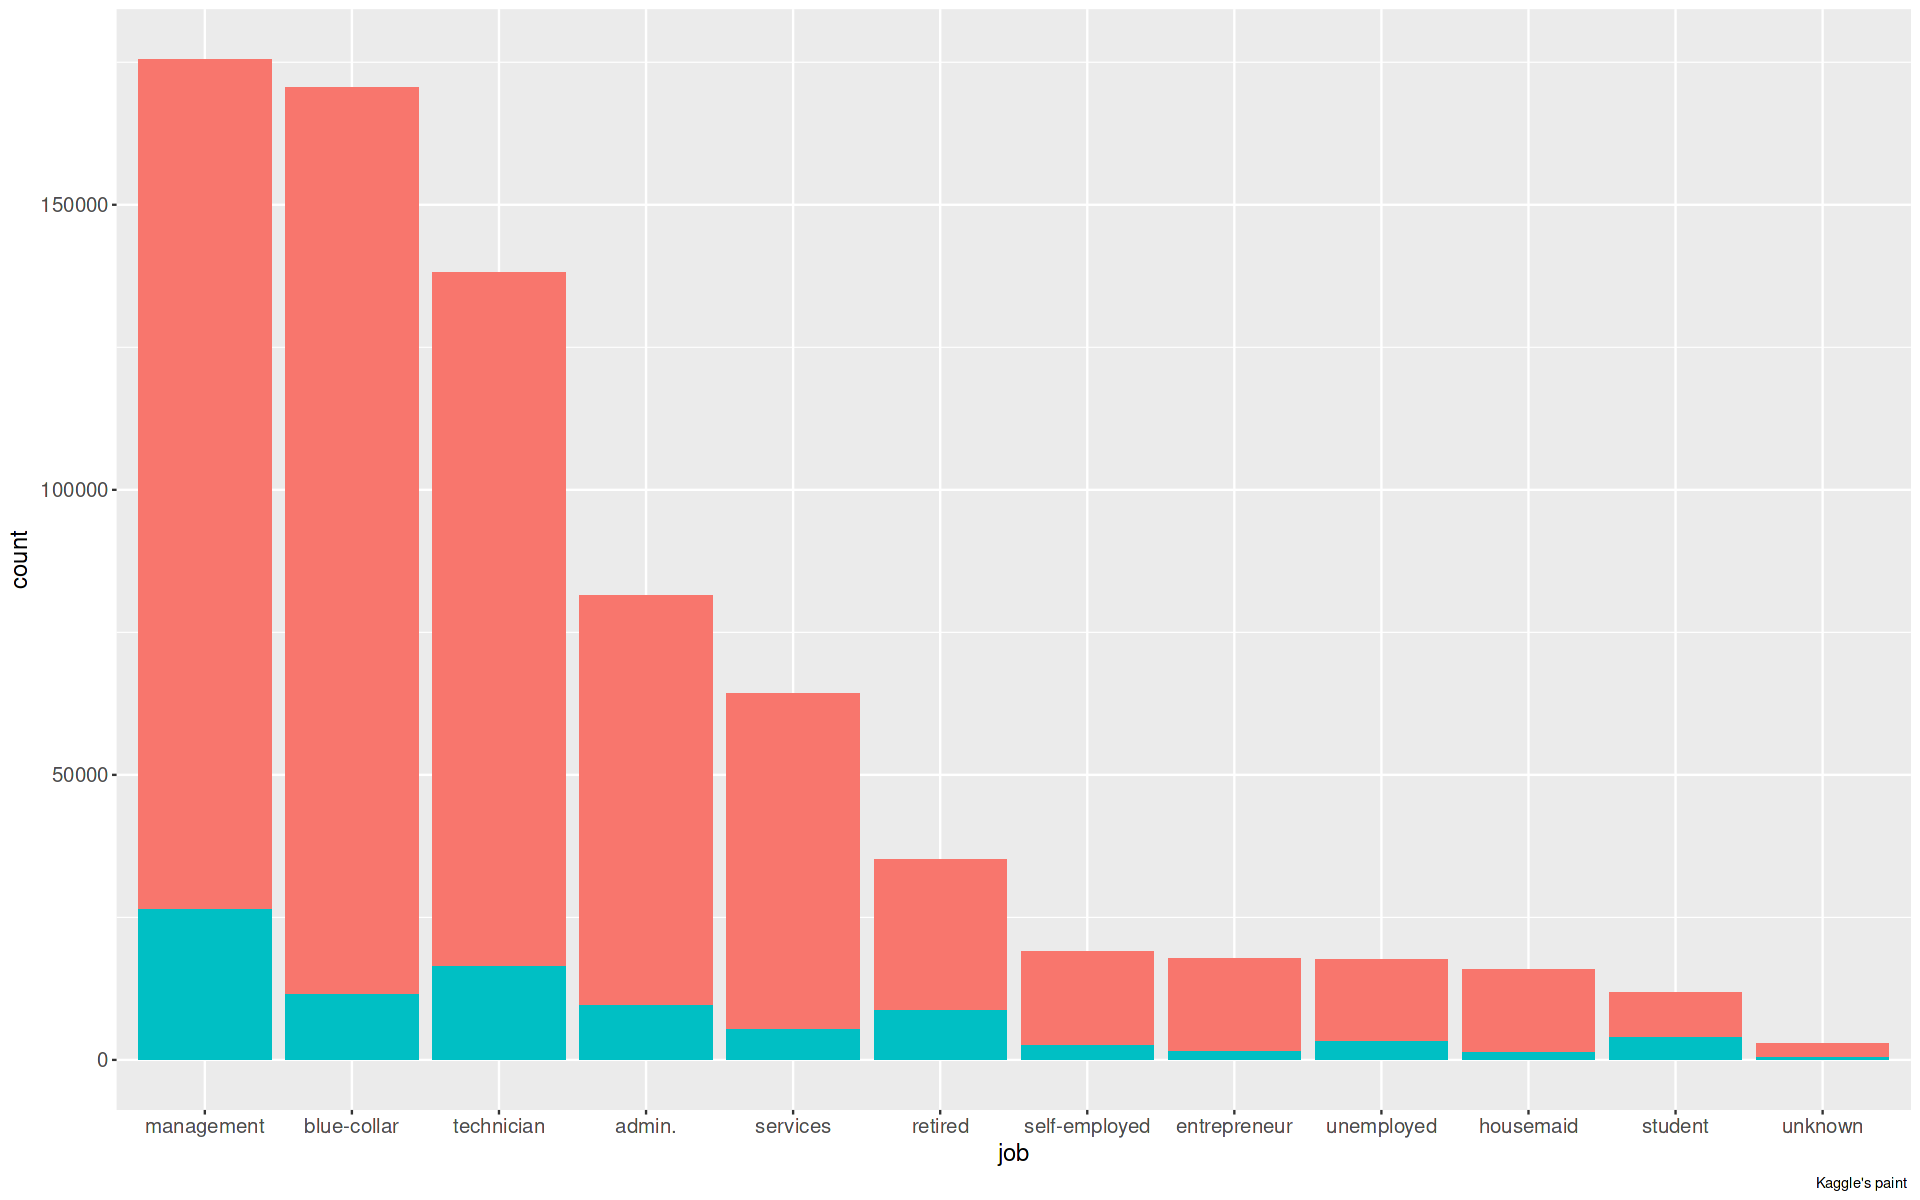

In [7]:
train_df %>% ggplot(aes(x = fct_infreq(job))) + geom_bar(aes(fill = y)) +
 theme_gvglentini+ labs(x = "job", caption = g_caption)

In [8]:
# Percentage of subscription (target variable y) for blue-collars vs other jobs
train_df <- train_df %>% mutate(blue_collar_job = (job == "blue-collar" | job == "services" | job == "entrepreneur"))

train_df %>% group_by(blue_collar_job) %>% 
    summarize(subscription_pct = round(100 * mean(y == 1), digits = 2))

blue_collar_job,subscription_pct
<lgl>,<dbl>
FALSE,14.52
TRUE,7.23


# 3. Rpart Model

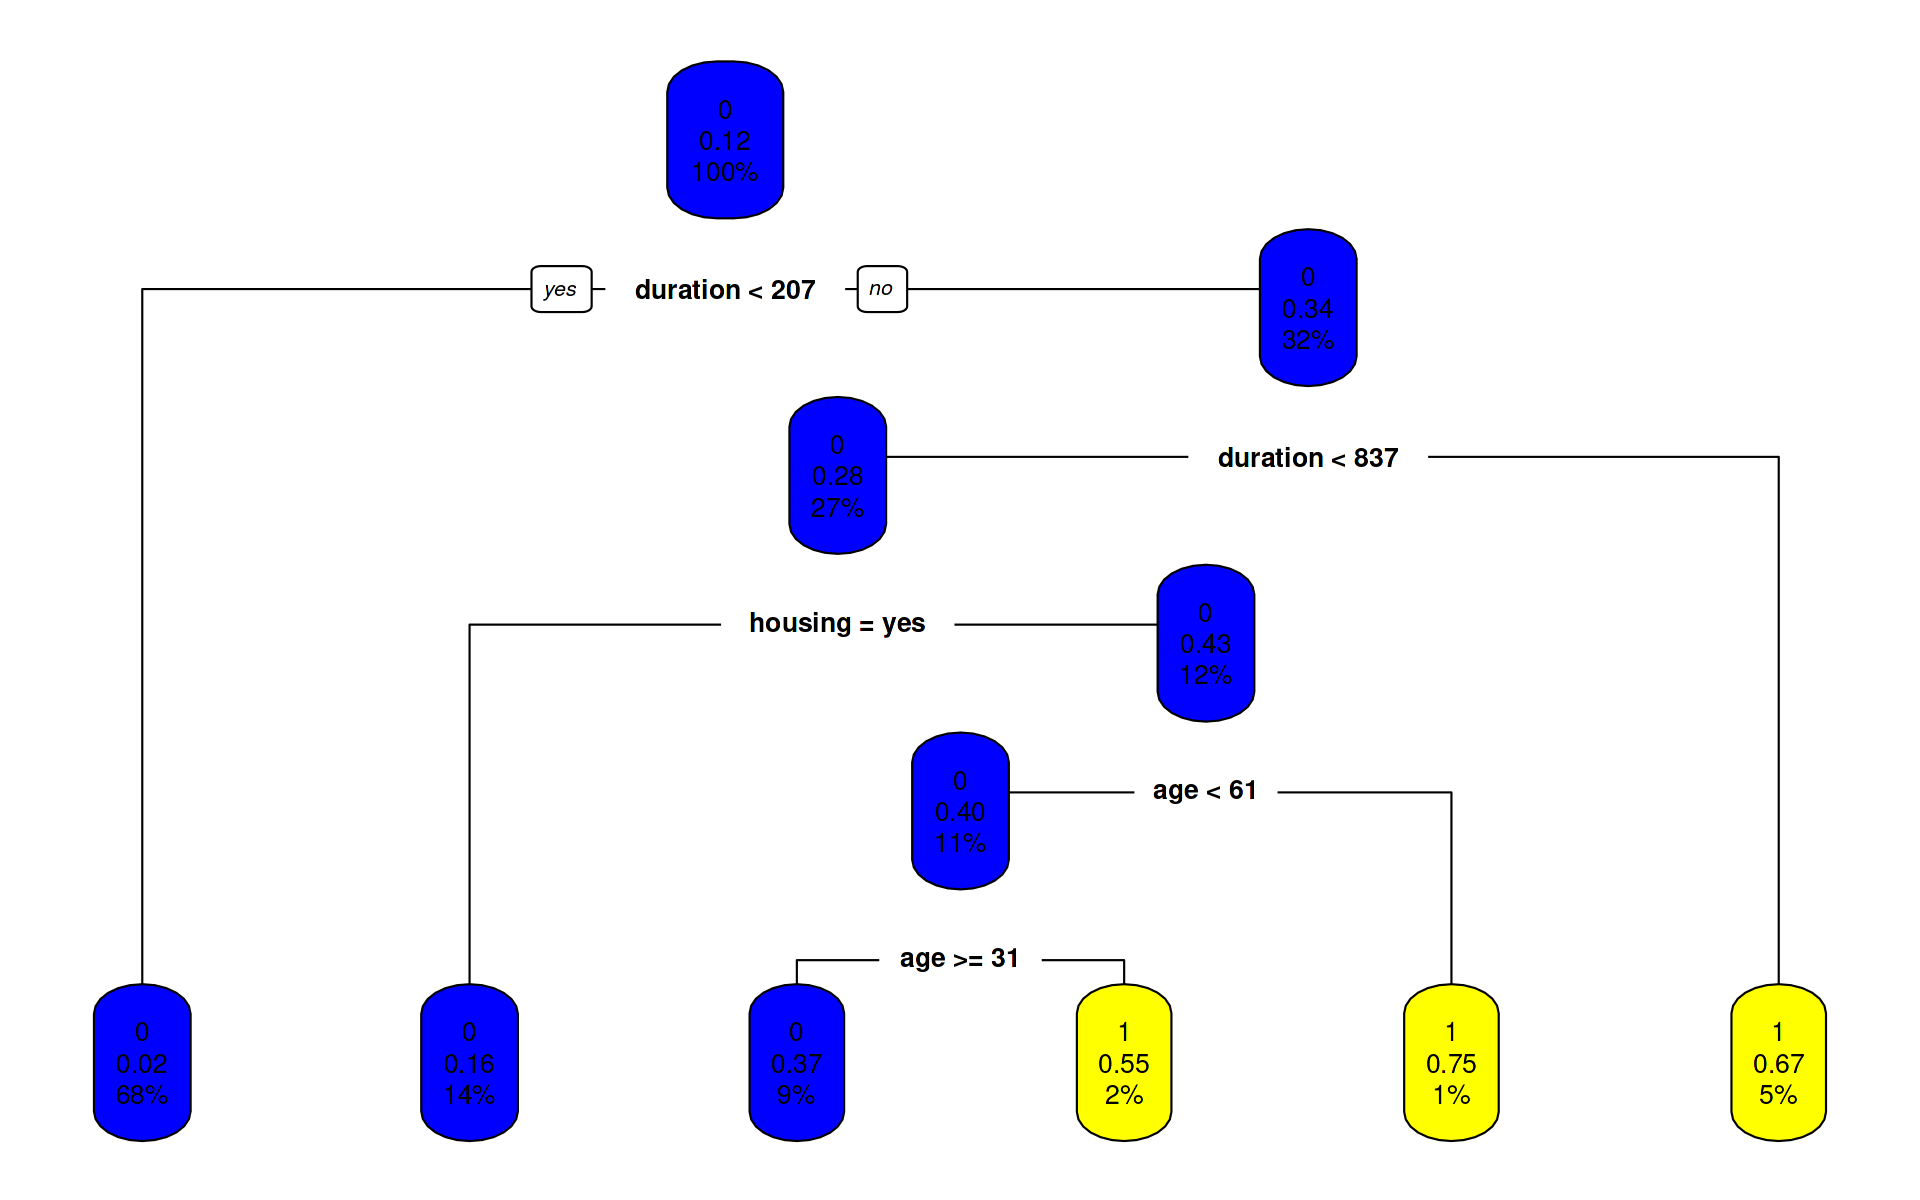

In [9]:
# Load the requested packages and plot the rpart tree
model_tree <- rpart(formula = y ~ age + duration + housing, data = train_df, method = "class")
rpart.plot(model_tree , box.palette = c('blue', 'yellow'),cex = 1.3)

In [10]:
set.seed(123)  
model_forest <- randomForest(formula = as.factor(y) ~ age + duration + housing + blue_collar_job,
                                                        data = train_df , ntree = 100 , importance = TRUE) 
importance(model_forest) 


,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
age,18.207523,32.42367,43.50306,5794.014
duration,48.890780,62.74583,56.76855,50868.900
housing,15.373929,23.63790,27.12867,5839.862
blue_collar_job,-5.051339,16.23357,20.60949,2229.729


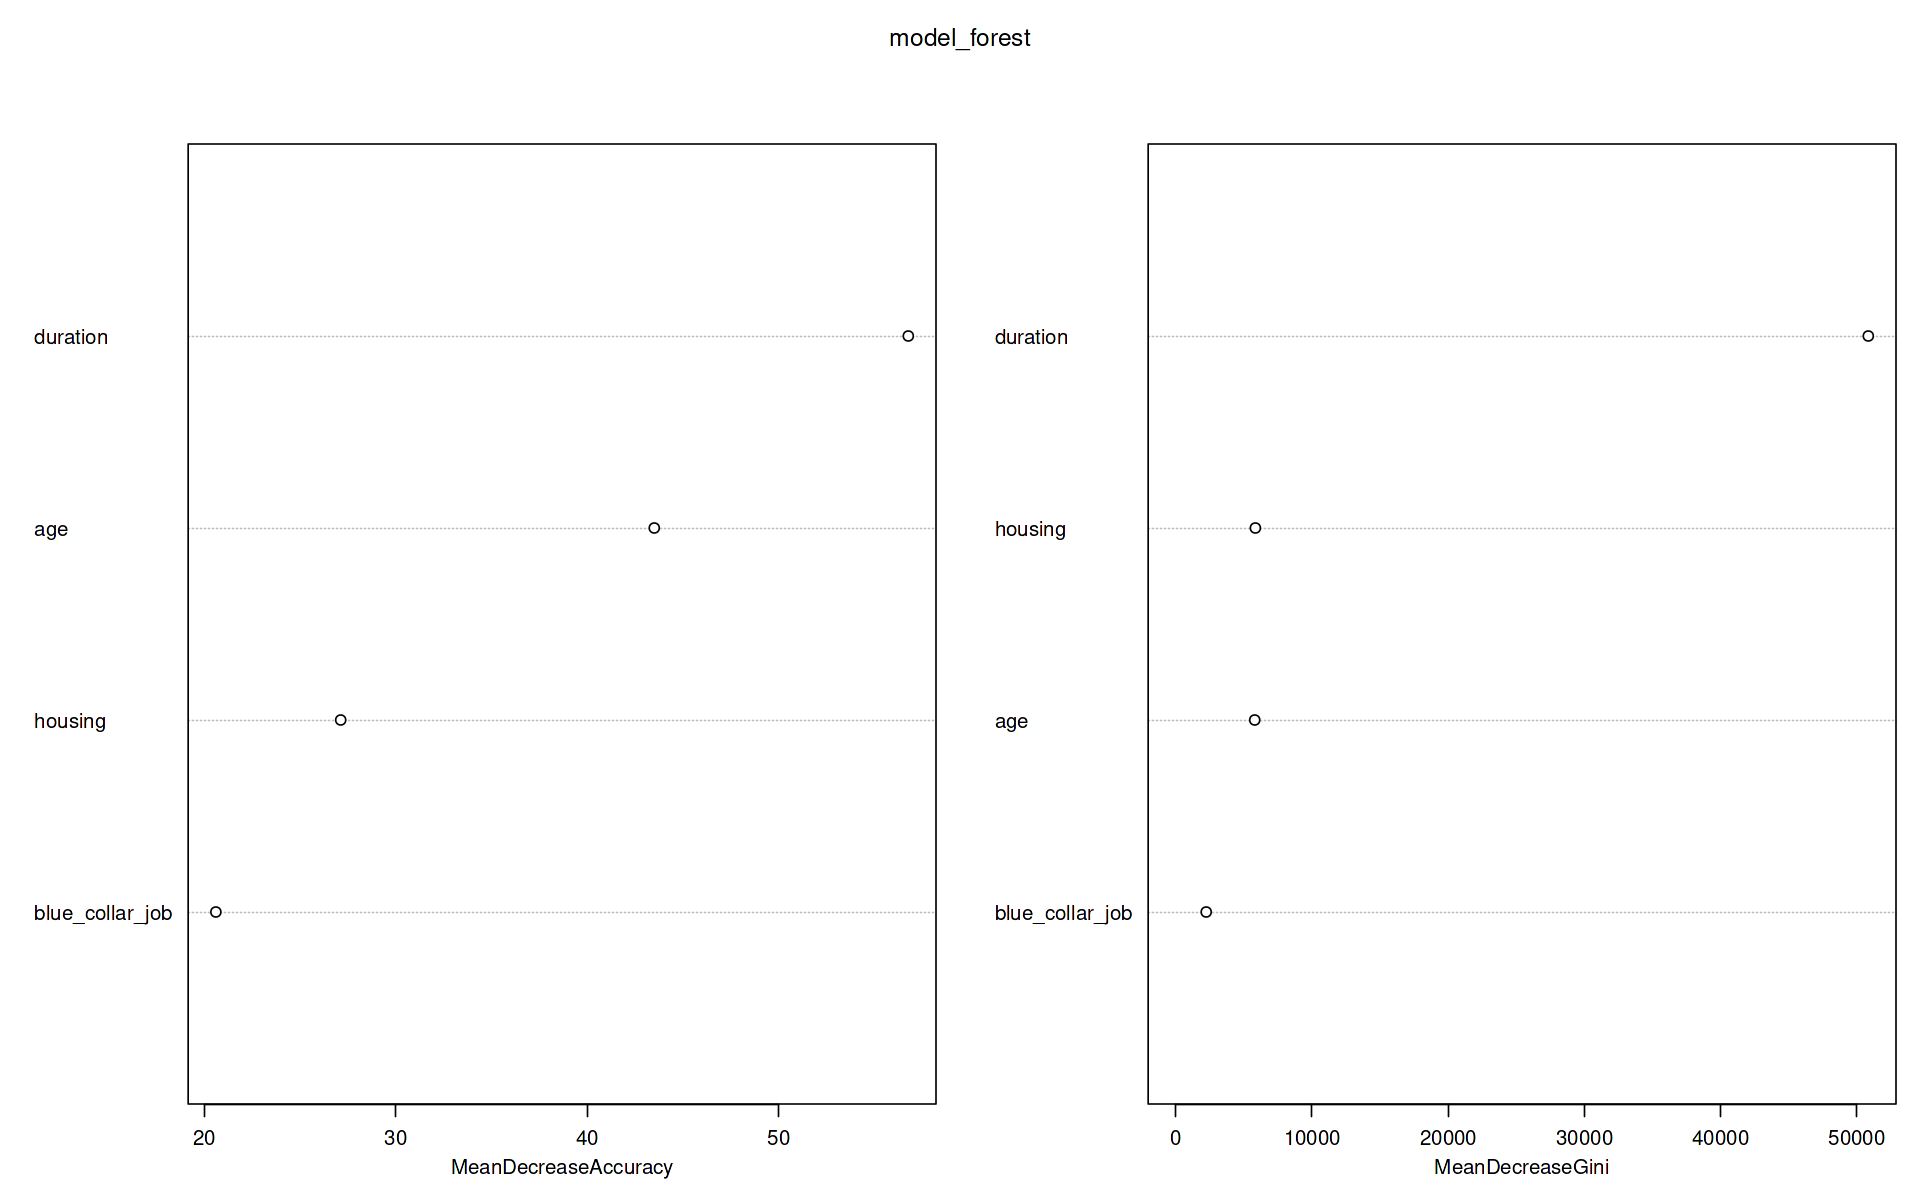

In [11]:
varImpPlot(model_forest , cex = 1)

# 4. Expectations on the test dataset

In [12]:
# Load the test dataset
test_df <- read_csv("/kaggle/input/playground-series-s5e8/test.csv")

test_df <- test_df %>% mutate(across(where(is.character), as.factor)) 

test_df <- test_df %>% mutate(blue_collar_job = (job == 'blue_collar'| job == 'services'| job == 'entrepreneur'))

str(test_df)

Rows: 250000 Columns: 17


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): job, marital, education, default, housing, loan, contact, month, po...
dbl (8): id, age, balance, day, duration, campaign, pdays, previous



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tibble [250,000 × 18] (S3: tbl_df/tbl/data.frame)
 $ id             : num [1:250000] 750000 750001 750002 750003 750004 ...
 $ age            : num [1:250000] 32 44 36 58 28 43 26 60 45 41 ...
 $ job            : Factor w/ 12 levels "admin.","blue-collar",..: 2 5 7 2 10 5 8 5 2 5 ...
 $ marital        : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 3 1 3 2 2 2 ...
 $ education      : Factor w/ 4 levels "primary","secondary",..: 2 3 1 2 2 4 1 3 1 3 ...
 $ default        : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance        : num [1:250000] 1397 23 46 -1380 1950 ...
 $ housing        : Factor w/ 2 levels "no","yes": 2 2 2 2 2 1 1 1 1 1 ...
 $ loan           : Factor w/ 2 levels "no","yes": 1 1 2 2 1 1 1 2 1 1 ...
 $ contact        : Factor w/ 3 levels "cellular","telephone",..: 3 1 1 3 1 1 1 1 2 1 ...
 $ day            : num [1:250000] 21 3 13 29 22 21 29 9 6 18 ...
 $ month          : Factor w/ 12 levels "apr","aug","dec",..: 9 1 9 9 6 6 5 6 4 2 ...
 $ duratio

In [13]:
test_df$y_predicted <- predict(object = model_forest , newdata = test_df) 

head(test_df$y_predicted) 


1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

# 5. Submission's file

In [14]:
# Create submission dataset
my_submission <- data.frame(id  = test_df$id , y = test_df$y_predicted) 
head(my_submission)

,id,y
,<dbl>,<fct>
1,750000,0
2,750001,0
3,750002,0
4,750003,0
5,750004,0
6,750005,0


In [15]:
table(test_df$y_predicted) 
table(my_submission$y) 


     0      1 
229579  20421 


     0      1 
229579  20421 

In [16]:
write_csv(x = my_submission , file = 'submission.csv')